# Data Cleaning and Exploratory Data Analysis

We want to explore our data to see what's in it, but before we do this, we'll need to clean and preprocess our dataset.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#read in reviews.csv as a dataframe
df = pd.read_csv('D:/Datasets/reviews.csv')
df.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0
1,1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
2,2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
3,3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4
4,4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0


In [3]:
#check dataframe shape.
df.shape

(10000, 12)

In [4]:
#taking a look at some summary statistics of the data.
df.describe()

,Unnamed: 0,book_id,rating,n_votes,n_comments
count,10000.00000,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,4999.50000,1.184425e+07,3.737500,1.32860,0.252300
std,2886.89568,9.773148e+06,1.244246,4.81632,1.034771
min,0.00000,1.000000e+00,0.000000,0.00000,0.000000
25%,2499.75000,1.373347e+06,3.000000,0.00000,0.000000
50%,4999.50000,1.120334e+07,4.000000,0.00000,0.000000
75%,7499.25000,1.851409e+07,5.000000,1.00000,0.000000
max,9999.00000,3.625277e+07,5.000000,155.00000,25.000000


In [5]:
#checking to see how many unique values are in each column.
df.nunique()

Unnamed: 0      10000
user_id           245
book_id          8756
review_id       10000
rating              6
review_text      9923
date_added       9991
date_updated     9959
read_at          5398
started_at       2523
n_votes            55
n_comments         18
dtype: int64

In [6]:
#Checking to see how many null values are in the dataframe.
df.isnull().sum()

Unnamed: 0         0
user_id            0
book_id            0
review_id          0
rating             0
review_text        2
date_added         0
date_updated       0
read_at         1627
started_at      4362
n_votes            0
n_comments         0
dtype: int64

<AxesSubplot:xlabel='review_text', ylabel='Count'>

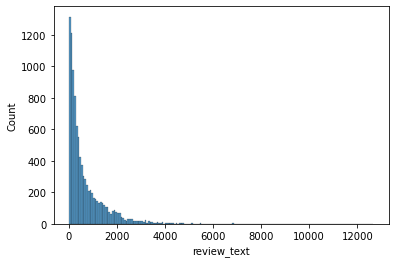

In [7]:
#look at the length of strings in the 'review_text' column.
sns.histplot(data = df, x = df['review_text'].str.len())

In [8]:
#creating a copy of the dataframe to clean and preprocess.
df2 = df.copy()

In [9]:
#drop na's from the dataframe.
df2.dropna(inplace=True)

#check to see if all null values were removed.
df2.isnull().sum()

Unnamed: 0      0
user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

In [10]:
#check dtypes in the dataframe.
df2.dtypes

Unnamed: 0       int64
user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [11]:
#Take a look at the first review to see what it looks like.
df2['review_text'].unique()[0]

"Mind blowingly cool. Best science fiction I've read in some time. I just loved all the descriptions of the society of the future - how they lived in trees, the notion of owning property or even getting married was gone. How every surface was a screen. \n The undulations of how society responds to the Trisolaran threat seem surprising to me. Maybe its more the Chinese perspective, but I wouldn't have thought the ETO would exist in book 1, and I wouldn't have thought people would get so over-confident in our primitive fleet's chances given you have to think that with superior science they would have weapons - and defenses - that would just be as rifles to arrows once were. \n But the moment when Luo Ji won as a wallfacer was just too cool. I may have actually done a fist pump. Though by the way, if the Dark Forest theory is right - and I see no reason why it wouldn't be - we as a society should probably stop broadcasting so much signal out into the universe."

In [12]:
#A contractions dictionary from Wikipedia found on Stack Overflow for expanding contractions: 
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:
import re

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

#Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df2['review_text']=df2['review_text'].apply(lambda x:expand_contractions(x))

In [14]:
#make all reviews lowercase.
df2['review_text'] = df2['review_text'].apply(lambda x: x.lower())

In [15]:
#check text after expanding contractions and lowercasing all words.
df2['review_text'].unique()[0]

"mind blowingly cool. best science fiction i have read in some time. i just loved all the descriptions of the society of the future - how they lived in trees, the notion of owning property or even getting married was gone. how every surface was a screen. \n the undulations of how society responds to the trisolaran threat seem surprising to me. maybe its more the chinese perspective, but i would not have thought the eto would exist in book 1, and i would not have thought people would get so over-confident in our primitive fleet's chances given you have to think that with superior science they would have weapons - and defenses - that would just be as rifles to arrows once were. \n but the moment when luo ji won as a wallfacer was just too cool. i may have actually done a fist pump. though by the way, if the dark forest theory is right - and i see no reason why it would not be - we as a society should probably stop broadcasting so much signal out into the universe."

In [16]:
#removing digits and words that contain digits because the numbers don't have much weight importance.
df2['review_text']=df2['review_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [17]:
import string

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
df2['review_text']=df2['review_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing all newline '\n' characters
df2 = df2.replace(r'\n',' ', regex=True) 

#removing all excess space.
df2['review_text']=df2['review_text'].apply(lambda x: re.sub('\s+',' ',x))


#Let's take another look at the text.
df2['review_text'].unique()[0]

'mind blowingly cool best science fiction i have read in some time i just loved all the descriptions of the society of the future how they lived in trees the notion of owning property or even getting married was gone how every surface was a screen the undulations of how society responds to the trisolaran threat seem surprising to me maybe its more the chinese perspective but i would not have thought the eto would exist in book and i would not have thought people would get so overconfident in our primitive fleets chances given you have to think that with superior science they would have weapons and defenses that would just be as rifles to arrows once were but the moment when luo ji won as a wallfacer was just too cool i may have actually done a fist pump though by the way if the dark forest theory is right and i see no reason why it would not be we as a society should probably stop broadcasting so much signal out into the universe'

This data is now ready to have stop words removed and be lemmatized. After this, EDA can happen.

In [18]:
#importing nltk and downloading packages for stopwords, lemmatizing, and word tokenizing
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asiap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asiap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asiap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
#create stopwords and lemmatizer.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [21]:
#function to tokenize words and remove stopwords.
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)  
    clean_tokens = [w for w in word_tokens if not w in stop_words]  
    
    return clean_tokens

In [22]:
df2['review_text'] = df2['review_text'].apply(remove_stopwords)
df2['review_text'].head()

0    [mind, blowingly, cool, best, science, fiction...
1    [special, book, started, slow, first, third, m...
2    [read, fun, mystery, book, sure, ever, read, p...
3    [fun, fast, paced, disturbing, tale, murder, g...
4    [fun, book, gives, sense, living, paris, expat...
Name: review_text, dtype: object

In [23]:
#function to lemmatize words.
def lemmatize_words(s):
    s = [lemmatizer.lemmatize(word) for word in s]
    return s

In [24]:
df2['review_text'] = df2['review_text'].apply(lemmatize_words)

#setting pd.set_option to display all text in the 'review_text' column.
pd.set_option("display.max_colwidth", None)
df2['review_text'].head(1)

0    [mind, blowingly, cool, best, science, fiction, read, time, loved, description, society, future, lived, tree, notion, owning, property, even, getting, married, gone, every, surface, screen, undulation, society, responds, trisolaran, threat, seem, surprising, maybe, chinese, perspective, would, thought, eto, would, exist, book, would, thought, people, would, get, overconfident, primitive, fleet, chance, given, think, superior, science, would, weapon, defense, would, rifle, arrow, moment, luo, ji, wallfacer, cool, may, actually, done, fist, pump, though, way, dark, forest, theory, right, see, reason, would, society, probably, stop, broadcasting, much, signal, universe]
Name: review_text, dtype: object

## Exploratory Data Analysis

Now that our data has been cleaned, we've removed stop words, and lemmatized words, we will now explore our data some more.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Count'>

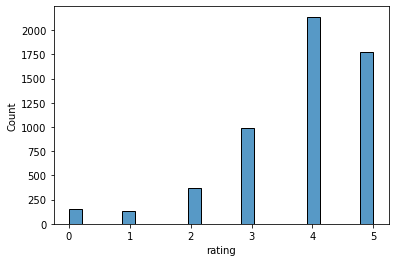

In [26]:
#distribution of reviews.
sns.histplot(data = df2, x = 'rating')

In [27]:
from collections import Counter

text_list = df2['review_text'].to_list()
text_count = Counter(count for sublist in text_list for count in sublist)

#print(text_count)

<BarContainer object of 10 artists>

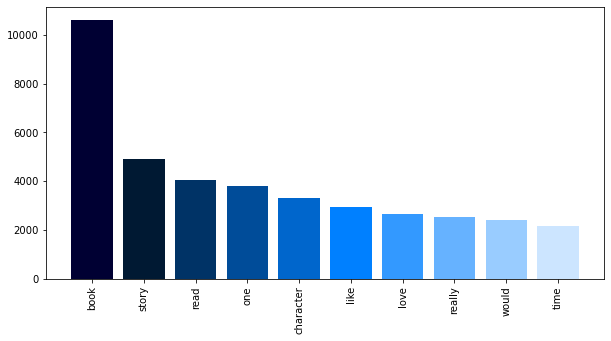

In [28]:
#sorting the dictionary
sorted_dict = sorted(text_count.items(), key = lambda kv: kv[1], reverse = True)
words, values = zip(*sorted_dict)

colors = ['#000033', '#001933', '#003366', '#004C99', '#0066CC', '#0080FF', '#3399FF', '#66B2FF', '#99CCFF', '#CCE5FF']
x = words[:10]
y = values[:10]

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
display(plt.bar(x, y, color = colors))

In [29]:
#parts of speech tagging
from nltk.tag import pos_tag, pos_tag_sents

text_list = df2['review_text'].to_list()
tagged_list = pos_tag_sents(text_list)
tag_count = Counter(tag for sublist in tagged_list for word,tag in sublist)

print(tag_count)

Counter({'NN': 193419, 'JJ': 89693, 'RB': 37312, 'VBD': 22200, 'VBG': 21297, 'VBP': 15944, 'VB': 15457, 'VBN': 12601, 'IN': 10437, 'NNS': 9027, 'CD': 6194, 'MD': 5569, 'VBZ': 3967, 'FW': 3133, 'JJS': 1946, 'DT': 1532, 'JJR': 1509, 'RBR': 970, 'RP': 512, 'CC': 386, 'NNP': 385, 'PRP': 304, 'RBS': 124, 'WDT': 123, 'WP$': 108, 'UH': 98, 'WRB': 55, 'WP': 52, 'EX': 47, 'PRP$': 35, 'TO': 24, 'PDT': 1, 'POS': 1})


<BarContainer object of 33 artists>

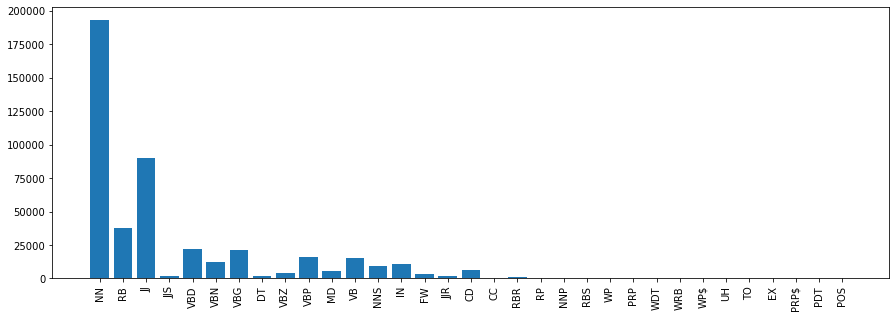

In [30]:
names = list(tag_count.keys())
values = list(tag_count.values())

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
display(plt.bar(names, values))

In [31]:
#import gzip
#import json
#import os
#import sys
#import re
#import pandas as pd
#import numpy as np
#from random import choice

In [32]:
#create a variable that includes the directory that the data is in.
#DIR = 'D:\Datasets'

In [33]:
#create a function called load_data that takes a compressed json file and load in a specified amount of the data.
#def load_data(file_name, head = 9999):
#    count = 0
#    data = []
#    with gzip.open(file_name) as fin:
#        for l in fin:
#            d = json.loads(l)
#            count += 1
#            data.append(d)
#            
            # break if reaches the 100th line
#            if (head is not None) and (count > head):
#                break
#    return data

In [34]:
#create a variable called reviews using the load_data function that loads in the json data as a dictionary.
#genres = load_data(os.path.join(DIR, 'goodreads_book_genres_initial.json.gz'))

In [35]:
#Checking data by pulling a random sample of the data.
#np.random.choice(genres)

In [36]:
#genre_df = pd.DataFrame.from_dict(genres)
#genre_df.head()

In [37]:
#merge df2 with genre_df by book_id


In [38]:
#we're going to look at ratings by genre
#load in data

#make data a pandas dataframe

#merge genre_df with df2

#plot ratings and genre

In [39]:
#for eda: pos tagging overview, ratings by genre (will need to load in books genre data from website),
#possible word cloud to visualize most common words, or maybe we utilize scatter text here.

## Preparing Machine Learning Models

In [40]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
#pulling the two columns that will be used to train the model from the dataset

#spliting data into train, validate, and test
X = df2['review_text']
y = df2['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
print(y_train.shape)

(4167,)


In [42]:
#vectorizing the reviews via tfidvectorizer 
def use_tokens(tokens):
    return tokens

vectorizer = TfidfVectorizer(tokenizer = use_tokens, preprocessor = use_tokens)
X_train_tvec = vectorizer.fit_transform(X_train)

print(X_train_tvec.shape)

(4167, 30173)


In [43]:
#vectorizing reviews using word2vec
model = Word2Vec( X_train, vector_size=100, window=5, min_count=1, workers=4)

#create document vectors by first creating sentence vectors and then averaging them
words = set(model.wv.index_to_key)
X_train_wvec = np.array([np.array([model.wv[i] for i in l if i in words]) for l in X_train], dtype = 'object')

print(X_train_wvec.shape)

(4167,)


In [44]:
X_train_wvec_avg = []
for v in X_train_wvec:
    if v.size:
        X_train_wvec_avg.append(v.mean(axis=0))
    else:
        X_train_wvec_avg.append(np.zeros(100, dtype=float))
        
words = set(model.wv.index_to_key)
X_train_wvec_avg = np.array(X_train_wvec_avg)

print(X_train_wvec_avg.shape)

(4167, 100)


## K-fold Cross Validation

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
#RNN deep learning model falls under this section but will need to be done on cloud computing resource.

In [47]:
#clf_bayes = GaussianNB()
#clf_svm = SVC()

#cross validation with tfid vectors
#naive_scoret = cross_validate(clf_bayes, X_train_tvec, y_train, cv = 10)
#svm_scoret = cross_validate(clf_svm, X_train_tvec, y_train, cv = 10)

#corss validation with word2vec vecotrs
#naive_scorew = cross_validate(clf_bayes, X_train_wvec_avg, y_train, cv = 10)
#svm_scorew = cross_validate(clf_svm, X_train_wvec_avg, y_train, cv = 10)

In [ ]:
#print(naive_scoret)
#print(svm_scoret)
#print(naive_scorew)
#print(svm_scorew)

## Supervised Models

In [ ]:
#Create Naive Bayes model to use as a baseline sentiment analysis model

#clf_bayes = GaussianNB()

#naive_tmodel = clf_bayes.fit(X_train_tvec, y_train)
#naive_wmodel = clf_bayes.fit(X_train_wvec_avg, y_train)

#y_predt = naive_tmodel.predict()
#y_predw = naive_wmodel.predict()

In [ ]:
#Create SVM model
#made need to use standard scalar. Look into it.

#clf_svm = svm.SVC()

#svm_tmodel = clf_svm.fit(X_train_tvec, y_train)
#svm_wmodel = clf_svm.fit(X_train_wvec_avg, y_train)

#y_predt = svm_tmodel.predict()
#y_predw =svm_wmodel.predict()

## Unsupervised Models

In [ ]:
#from sklearn.decomposition import TruncatedSVD
#from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering

In [ ]:
#creating latent semantic indexing model
#may need to create a dense matrix for this

#svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

#svd_tmodel = svd.fit(X_train_tvec, y_train)
#svd_wmodel = svd.fit(X_train_wvec_avg, y_train)

#y_predt =
#y_predw =

In [ ]:
#creating kmeans clustering model

#kmeans = KMeans(n_clusters=2, random_state=0)

#kmeans_tmodel = kmeans.fit(X_train_tvec, y_train)
#kemeans_wmodel = kmeans.fit(X_train_wvec_avg, y_train)

#y_predt = kmeans_tmodel.predict()
#y_predw = kmeans_wmodel.predict()

In [ ]:
#creating hierarchical clustering model

#clustering = AgglomerativeClustering()

#cluster_tmodel = clustering.fit_predict(X_train_tvec, y_train)
#cluster_wmodel = clustering.fit_predict(X_train_wvec_avg, y_train)

#y_predt = 
#y_predw =

## Model Evaluation

In [ ]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#create a function that finds accuracy, f1 scores, precision, and recall scores for each model

#def evaluate(y_pred, y_true):
#    acc = accuracy_score(y_true, y_pred)
#    prec = precision_score(y_true, y_pred)
#    rec = recall_score(y_true, y_pred)
#    f_score = f1_score(y_true, y_pred)
    
#    return (acc, prec, rec, f_score)